## Information gain - mutual information

Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

As extracted from [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

I will demonstrate how to select features based on mutual information using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle. 

[참고 자료](http://sanghyukchun.github.io/62/)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
# load dataset

file_path = '/Users/wontaek/Documents/Lecture_dataset/BNP_Paribas_Cardif_claims/train.csv'
data = pd.read_csv(file_path, nrows=50000)
data.shape

(50000, 133)

In [3]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [5]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [6]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target

mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([2.57350142e-03, 4.30044934e-03, 1.77810331e-03, 3.00871497e-03,
       2.90185505e-03, 6.49484908e-03, 6.71195708e-03, 5.48880282e-03,
       2.58350917e-02, 2.94504481e-03, 1.72524995e-02, 4.03998641e-03,
       2.29442772e-02, 7.68026323e-03, 5.65898775e-03, 4.45000028e-03,
       3.52205259e-03, 2.07716251e-03, 3.30301711e-03, 1.16212249e-02,
       0.00000000e+00, 3.72985388e-03, 3.19584540e-03, 3.09414663e-03,
       9.58688720e-04, 3.30364695e-03, 5.56891450e-03, 7.80770548e-03,
       8.45420932e-03, 3.29963593e-03, 3.96100258e-03, 1.28736999e-03,
       1.56886265e-03, 6.39599290e-03, 7.15710836e-03, 3.65229764e-03,
       5.99533949e-03, 3.58003010e-03, 5.57486991e-03, 6.57844829e-03,
       8.52967457e-03, 6.17078664e-03, 5.37268450e-03, 3.91161426e-02,
       5.33132655e-03, 1.98902760e-03, 5.44827579e-03, 2.14269844e-03,
       4.55309833e-03, 1.99417931e-03, 3.02018043e-03, 3.52386965e-03,
       7.59459311e-03, 1.24537293e-02, 6.36282085e-03, 4.43988123e-03,
      

In [7]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50     0.039116
v10     0.025835
v14     0.022944
v12     0.017252
v129    0.015788
v62     0.012454
v21     0.011621
v114    0.009914
v46     0.008530
v34     0.008454
v101    0.008203
v33     0.007808
v65     0.007801
v15     0.007680
v61     0.007595
v40     0.007157
v98     0.006999
v82     0.006882
v8      0.006712
v45     0.006578
v7      0.006495
v118    0.006404
v39     0.006396
v63     0.006363
v48     0.006171
v93     0.006111
v117    0.006071
v111    0.006048
v120    0.006047
v42     0.005995
          ...   
v5      0.003009
v70     0.002980
v88     0.002960
v126    0.002950
v11     0.002945
v6      0.002902
v121    0.002579
v1      0.002574
v55     0.002143
v84     0.002123
v92     0.002077
v19     0.002077
v58     0.001994
v53     0.001989
v80     0.001961
v4      0.001778
v38     0.001569
v122    0.001452
v37     0.001287
v87     0.001110
v95     0.000995
v97     0.000959
v28     0.000959
v96     0.000925
v78     0.000536
v81     0.000009
v23     0.000000
v102    0.0000

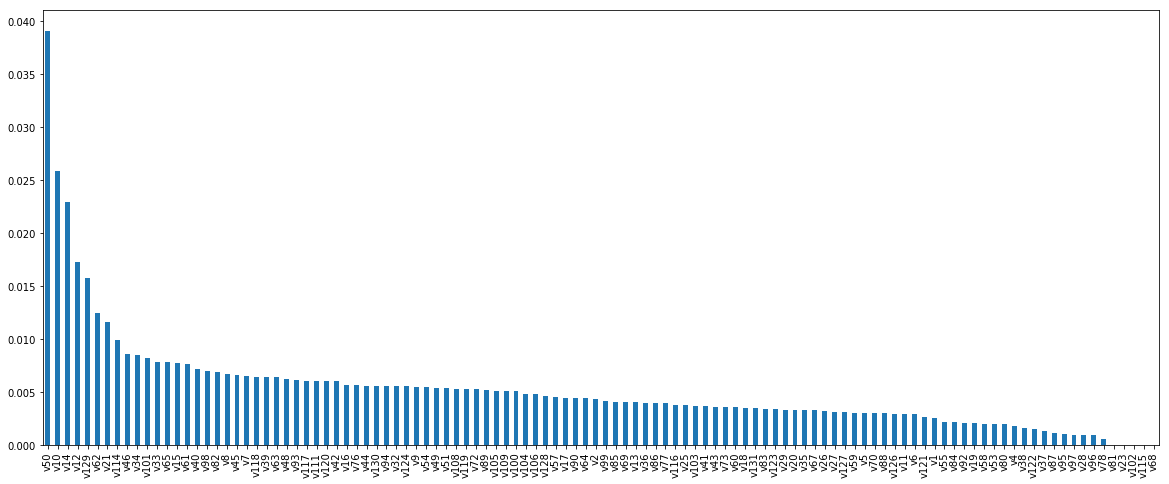

In [8]:
# and now let's plot the ordered MI values per feature

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Comparatively, we can see that there are a few features (left of the plot) that seem to contribute the most to predicting the target.There are also a few features with almost zero MI values on the right of the plot.

As I explained in the previous lecture, where to put the cut-off to select features is arbitrary. One could choose a certain value of MI after studying the plot above. An alternative and most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the the top 10th percentile of the MI value distribution.

To do this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. 

**SelectKBest** allows you to determine how many features, and SelectPercentile the features within a certain percentile. See below.

In [9]:
# here I will select the top 10 features
# which are shown below

sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v34', 'v39', 'v50', 'v62', 'v114', 'v129'], dtype='object')

### Regression

In [10]:
# load dataset
file_path = '/Users/wontaek/Documents/Lecture_dataset/House_Sale_Price/train.csv'
data = pd.read_csv(file_path)
data.shape

(1460, 81)

In [11]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [12]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [13]:
# determine the mutual information

mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

OverallQual      0.538161
GrLivArea        0.479859
TotalBsmtSF      0.382894
GarageCars       0.371708
GarageArea       0.370292
YearBuilt        0.350419
1stFlrSF         0.312331
GarageYrBlt      0.267941
FullBath         0.265425
YearRemodAdd     0.256572
MSSubClass       0.254508
2ndFlrSF         0.228789
LotFrontage      0.207467
TotRmsAbvGrd     0.184480
Fireplaces       0.173471
OpenPorchSF      0.169493
LotArea          0.167480
BsmtFinSF1       0.164863
OverallCond      0.114870
BsmtUnfSF        0.111491
MasVnrArea       0.095575
HalfBath         0.075169
WoodDeckSF       0.068357
BedroomAbvGr     0.039118
ScreenPorch      0.022725
BsmtFullBath     0.021928
KitchenAbvGr     0.017307
YrSold           0.012267
EnclosedPorch    0.010627
LowQualFinSF     0.004009
MiscVal          0.003471
BsmtFinSF2       0.003465
PoolArea         0.001398
BsmtHalfBath     0.000000
MoSold           0.000000
3SsnPorch        0.000000
Id               0.000000
dtype: float64

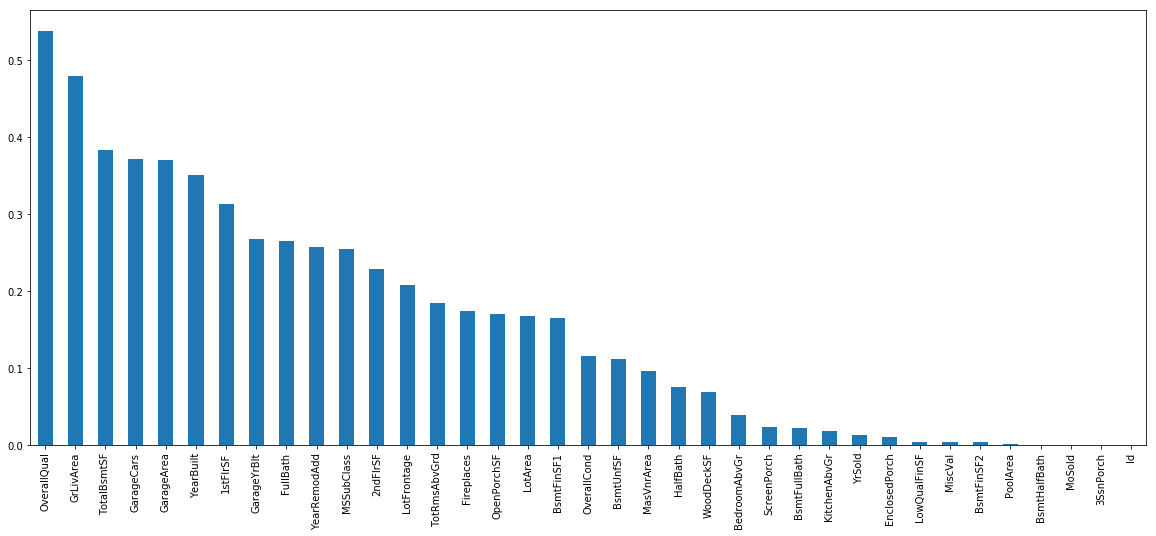

In [14]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [15]:
# here I will select the top 10 percentile

sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

I have not personally used mutual information in any of my projects. However, there is some value in the method. See for example:

Comparison between univariate and mutual information selection in [sklean website](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

In addition, mutual information has been widely covered, if anything else from a theoretical perspective, in several articles that I share in the additional reading resources section. Therefore I wanted to have it covered in the course, and I leave it up to you to explore it and see if you find any use in it.

That is all for this lecture, I hope you enjoyed it and see you in the next one!

**추가 내용**

Bivariate, Univariate, Multivariate 의 차이 : http://www.statedu.com/QnA/79573
- Bivariate 는 변수가 2개라는 뜻입니다. 그중에서도 주로 대등한 변수가 2개 있을 때 사용하는 용어입니다. 대표적인 예가 상관분석입니다. 상관분석은 두 변수 사이의 관계를 규명하는 분석이죠.
- Univariate 는 변수가 여러개라는 뜻입니다. 그 중에서도 독립변수를 말합니다. 즉, 독립변수가 여러 개인 경우의 분석 기법일 때에 univaite 라는 말을 사용하게 됩니다.
- Multivariate 도 역시 변수가 여러개라는 뜻입니다. 그러나, univariate 와 차이점은 종속변수가 여러개라는 것입니다. 이때 독립변수는 하나여도 상관이 없고 여러개 이어도 상관이 없습니다. 단지, 종속변수만 하나가 아니라 2개 이상인 경우에 쓰이는 말이죠.

그러나, 많은 분들이 착각하시는 것이 독립변수가 하나인 것을 univariate, 독립변수가 여러개이면 multivaiate 라고 합니다. 특히 의학쪽에서 많이 사용합니다. 이 부분은 용어를 혼동(multivariate 때문에)하고 있는 것이므로 주의를 하셔야 합니다.

독립변수와 매개변수
- https://drhongdatanote.tistory.com/14